<a href="https://colab.research.google.com/github/rachellesrg/FinanicalEngineering-RiskManagement_I/blob/main/LGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import metrics # data science
import matplotlib.pyplot as plt # plot
import seaborn as sns # plot
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [13]:
from google.colab import files
uploaded = files.upload()

Saving train_v2.csv to train_v2 (1).csv


# Data preparation

In [34]:
#data=pd.read_csv('train_v2_short.csv')
#data=pd.read_csv('train_v2_med.csv')
data=pd.read_csv('train_v2.csv')


In [35]:
data.shape

(105471, 771)

In [36]:
data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,...,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,105471.000000,105471.000000,105371.000000,105423.000000,1.054710e+05,105312.000000,105448.000000,105448.000000,105011.000000,103631.000000,103773.000000,1.047730e+05,105471.000000,105471.000000,1.047730e+05,105471.000000,105471.000000,105471.000000,105471.000000,104773.000000,...,104618.000000,104013.000000,105469.000000,105469.000000,105469.000000,105469.000000,105238.000000,104671.000000,104671.000000,104671.000000,104137.000000,105313.000000,105313.000000,103631.000000,105471.0,105470.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,104407.000000,103946.000000,105471.000000,105471.000000,105471.000000,105471.000000
mean,52736.000000,134.603171,8.246883,0.499066,2678.488874,7.354533,47993.704317,2974.336018,2436.363718,134.555225,134.596862,11.349015,0.696120,0.678140,4.010386e+06,0.673572,0.649476,0.510736,0.685829,0.746194,0.726551,3.014404e+09,82.179803,63.420561,1.108926e+06,92.134281,86.490683,103.850939,91.672933,90.045642,...,8.115740,0.138719,6.130018,5.500419,3.390325,2.158617,0.119762,10.602136,8.782883,7.341984,0.136195,12.921228,12.103488,-0.253806,1.0,-0.471021,-0.476605,-0.471572,-0.491973,-8.786110,17.422543,5.800976,-4.246788,3.273059,0.233852,0.014797,0.310246,0.322847,175.951589,0.799585
std,30446.999458,14.725467,1.691535,0.288752,1401.010943,5.151112,35677.136048,2546.551085,2262.950221,13.824682,14.504043,3.669019,0.242829,0.241969,6.623236e+06,0.232733,0.246958,0.173126,0.241082,0.237795,0.233876,2.070153e+09,28.316093,32.431329,3.015962e+05,36.904526,30.830152,40.968777,32.681102,12.535453,...,10.319706,0.115468,8.121672,7.143152,4.685670,3.163447,0.063974,12.899936,10.998444,9.435965,0.112682,14.973088,14.151640,0.237795,0.0,0.284702,0.194983,0.263993,0.141869,9.684043,18.548936,6.508555,4.828265,3.766746,0.073578,1.039439,0.462597,0.467567,298.294043,4.321120
min,1.000000,103.000000,1.000000,0.000006,1100.000000,1.000000,0.000000,1.000000,1.000000,106.820000,103.140000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.623600e+05,0.000000,0.000000,1.230000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.0,-0.970000,-0.950000,-0.963000,-0.945000,-85.450000,2.000000,0.000000,-43.160000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000,0.000000
25%,26368.500000,124.000000,8.000000,0.248950,1500.000000,4.000000,11255.000000,629.000000,746.000000,124.290000,123.870000,9.000000,0.680000,0.661500,4.117930e+05,0.656000,0.635600,0.432500,0.669400,0.729700,0.710500,1.508475e+09,81.000000,45.000000,9.267570e+05,84.000000,83.000000,91.000000,87.000000,84.000000,...,1.700900,0.058420,1.202000,1.122200,0.595700,0.323300,0.076388,2.535400,1.957400,1.530850,0.056469,3.361800,3.055100,-0.270300,1.0,-0.710000,-0.630000,-0.699000,-0.575900,-11.530000,5.000000,1.480000,-5.700000,0.740000,0.198400,-0.704275,0.000000,0.000000,19.000000,0.000000
50%,52736.000000,129.000000,9.000000,0.498267,2200.000000,4.000000,76530.000000,2292.000000,1786.000000,128.460000,129.080000,11.000000,0.770500,0.754200,1.672764e+06,0.745800,0.736000,0.539200,0.761900,0.818200,0.798200,2.233947e+09,91.000000,65.000000,1.115136e+06,94.780000,94.000000,108.000000,99.000000,92.000000,...,4.261950,0.083637,3.081600,2.840700,1.627000,0.957600,0.103507,5.855800,4.711500,3.830000,0.082008,7.564900,7.045500,-0.181800,1.0,-0.500000,-0.480000,-0.480000,-0.503100,-5.440000,11.000000,3.570000,-2.600000,1.

In [37]:
#data.mean().isnull()
data.info()
data_ = data
data_.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(680), int64(91)
memory usage: 620.4 MB


(105471, 771)

In [38]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [39]:
missing_values_table(data).head(10)

Your selected dataframe has 771 columns.
There are 525 columns that have missing values.


,Missing Values,% of Total Values
f662,18833,17.9
f663,18833,17.9
f159,18736,17.8
f160,18736,17.8
f170,18417,17.5
f169,18417,17.5
f618,18407,17.5
f619,18407,17.5
f331,18067,17.1
f330,18067,17.1


In [42]:
# drop all rows containing null
data = data.dropna()

# drop all columns containing null
#df.dropna(axis=1)
missing_values_table(data).head(10)

Your selected dataframe has 771 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [45]:
data.shape

(51940, 771)

In [ ]:
#dataf = data.fillna(data.mean(), inplace=True)
#missing_values_table(data).head(10)

Text(0.5, 1.0, 'Loss Distribution')

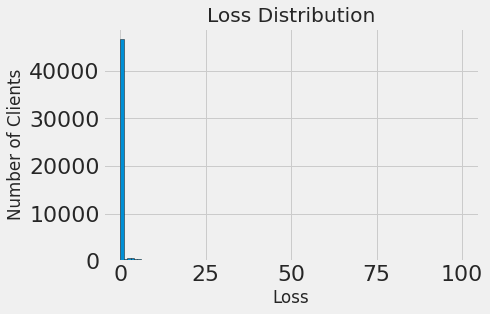

In [48]:
# # Single Variable Plots

figsize=(8, 8)

# Histogram of the loss
#plt.style.use('fivethirtyeight')
plt.hist(data['loss'], bins = 100, edgecolor = 'k')
plt.xlabel('Loss') 
plt.ylabel('Number of Clients');
plt.title('Loss Distribution')

In [49]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = data.corr()['loss'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

f323   -0.021138
f322   -0.020753
f315   -0.020286
f314   -0.019986
f299   -0.017410
f298   -0.015485
f677   -0.013954
f734   -0.011901
f69    -0.011795
f290   -0.011782
f773   -0.011583
f428   -0.011569
f738   -0.011489
f64    -0.011280
f771   -0.011166
Name: loss, dtype: float64 

f767    0.025030
f405    0.025032
f471    0.029369
loss    1.000000
f33          NaN
f34          NaN
f35          NaN
f37          NaN
f38          NaN
f678         NaN
f700         NaN
f701         NaN
f702         NaN
f736         NaN
f764         NaN
Name: loss, dtype: float64


In [50]:
for i in data.columns:
    if len(set(data[i]))==1:
        data.drop(labels=[i], axis=1, inplace=True)
data.shape

(51940, 760)

In [51]:
# Find all correlations and sort 
correlations_data = data.corr()['loss'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

f323   -0.021138
f322   -0.020753
f315   -0.020286
f314   -0.019986
f299   -0.017410
f298   -0.015485
f677   -0.013954
f734   -0.011901
f69    -0.011795
f290   -0.011782
f773   -0.011583
f428   -0.011569
f738   -0.011489
f64    -0.011280
f771   -0.011166
Name: loss, dtype: float64 

f670    0.020518
f599    0.020945
f597    0.020945
f281    0.021998
f400    0.022632
f282    0.023085
f675    0.023359
f404    0.023678
f766    0.023711
f676    0.024582
f765    0.024582
f767    0.025030
f405    0.025032
f471    0.029369
loss    1.000000
Name: loss, dtype: float64


In [52]:
# # # Feature Engineering and Selection

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between loss
    y = x['loss']
    x = x.drop(columns = ['loss'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['loss'] = y
               
    return x

In [53]:
# Remove the collinear features above a specified correlation coefficient
data = remove_collinear_features(data, 0.5);

In [54]:
data.shape

(51940, 112)

In [55]:
data.describe()

,id,f1,f2,f3,f5,f6,f7,f8,f13,f14,f15,f16,f19,f36,f44,f69,f70,f71,f72,f75,f76,f77,f80,f81,f82,f83,f92,f93,f102,f103,...,f566,f586,f587,f588,f601,f604,f614,f615,f616,f618,f619,f634,f635,f638,f640,f648,f649,f650,f652,f657,f658,f660,f679,f696,f725,f733,f740,f746,f776,loss
count,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,5.194000e+04,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,...,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,5.194000e+04,5.194000e+04,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000
mean,53865.652099,133.783385,8.100231,0.498406,7.547189,46628.654332,3116.184521,2647.083924,11.272218,0.747619,0.729848,4.192362e+06,0.550639,23.651251,-0.649501,0.002499,0.002679,0.084898,0.873191,6.147015,6.137169,6.551574,0.973362,1.503603,0.108963,0.101583,0.109266,0.101564,0.107356,0.099947,...,1.164131,12.481790,12.732243,0.068532,0.032542,0.004371,0.025197,0.003080,0.002771,0.376593,0.203976,10.470073,23.525991,0.922962,92.611886,0.723448,2.784797,0.145441,40.511667,1.461565e+05,4.845075e+07,1.264745,2.239719,0.260370,3.103466,5.402860,10.795402,-0.002720,0.185175,0.824336
std,30563.110631,14.251180,1.744187,0.288387,5.239241,35810.475297,2582.520858,2314.065688,3.752351,0.201968,0.201959,6.791321e+06,0.156579,20.497942,0.762726,0.053552,0.061326,0.141668,6.340987,2.458177,3.649718,0.696476,0.216251,0.372191,0.177576,0.273918,0.175923,0.273461,0.173627,0.271513,...,0.034103,320.009158,326.840899,0.790490,0.470726,0.035792,0.447204,0.025717,0.021314,1.377899,0.892899,25.302968,693.226223,0.463169,9.419752,5.434301,17.840590,1.805776,70.233345,1.687399e+05,1.113234e+08,0.298089,1.494609,0.047657,1.908645,1.849771,46.334931,0.801646,0.388443,4.083566
min,3.000000,103.000000,1.000000,0.000038,1.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000100,3.000000,-7.413036,-0.250000,-0.310000,0.000000,-1.000000,1.030000,1.000000,3.470000,-0.910000,1.100000,0.010000,0.000000,0.010000,0.000000,0.010000,0.000000,...,-0.630000,-1.000000,-1.000000,-1.000000,-0.880000,0.000000,-0.880000,-0.050000,-0.330000,0.000000,0.000000,0.001000,0.000000,-7.160910,39.721000,-1.000000,-1.000000,-1.000000,1.000000,3.460000e+02,4.510000e+03,-1.180000,1.000000,0.014790,0.000000,0.330000,-513.650000,-1.425700,0.000000,0.000000
25%,27474.250000,124.000000,7.000000,0.249228,4.000000,10845.000000,707.000000,906.000000,9.000000,0.728800,0.714300,4.324740e+05,0.482900,9.000000,-1.102893,-0.030000,-0.030000,0.009900,-0.080000,4.340000,3.210000,6.110000,0.880000,1.340000,0.010000,0.000000,0.010000,0.000000,0.010000,0.000000,...,1.150000,-0.070000,-0.090000,-0.130000,-0.250000,0.000000,-0.230000,0.000000,0.000000,0.020000,0.000000,2.746000,2.258000,0.844897,86.725000,-0.740000,-0.770000,-0.080000,12.000000,4.464725e+04,6.426199e+06,1.170000,1.000000,0.237566,2.000000,4.160000,-9.420000,-0.764700,0.000000,0.000000
50%,54258.500000,129.000000,8.000000,0.496805,4.000000,75932.000000,2504.000000,1998.000000,11.000000,0.798200,0.782300,1.820098e+06,0.574500,17.000000,-0.873171,0.000000,0.000000,0.033800,0.000000,5.880000,5.610000,6.470000,0.940000,1.400000,0.010000,0.000000,0.010000,0.000000,0.010000,0.000000,...,1.160000,0.010000,0.010000,0.050000,-0.050000,0.000000,-0.040000,0.000000,0.000000,0.090000,0.020000,6.721000,7.293000,1.022070,93.024000,-0.180000,-0.110000,0.020000,20.000000,9.413800e+04,1.669782e+07,1.300000,2.000000,0.266288,3.000000,5.330000,4.400000,-0.260100,0.000000,0.000000
75%,80

# Train and test data

In [60]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = data.drop(columns='loss')
targets = pd.DataFrame(data['loss'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41552, 111)
(10388, 111)
(41552, 1)
(10388, 1)


In [61]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

# Models1


In [ ]:
# # # Models to Evaluate

# We will compare five different machine learning Cassification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [ ]:
# # Naive Bayes
#from sklearn.naive_bayes import GaussianNB
#naive = GaussianNB()
#naive_cross = fit_and_evaluate(naive)
#print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

In [ ]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)
#print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)
y_pred = random.predict(X_train)
# Model Evaluation
print('Random Forest Classifier performance metrics')
print('Cross Validation Score = %0.4f' % random_cross)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Random Forest Classifier performance metrics
Cross Validation Score = 0.9098
R^2: 0.7567933924921515
Adjusted R^2: 0.7527754919995832
MAE: 0.167
MSE: 4.6485
RMSE: 2.156038033059714


In [ ]:
# # Gradient Boosting Classification
#from xgboost import XGBClassifier
#gb = XGBClassifier()
#gb_cross = fit_and_evaluate(gb)

#print('Gradient Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

In [ ]:
# # Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_cross = fit_and_evaluate(lr)
#print('Linear Regression Performance on the test set: Cross Validation Score = %0.4f' % lr_cross)
y_pred = lr.predict(X_train)
# Model Evaluation
print('Linear Regression performance metrics')
print('Cross Validation Score = %0.4f' % lr_cross)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Linear Regression performance metrics
Cross Validation Score = -0.0297
R^2: 0.03272254991122703
Adjusted R^2: 0.016742619994904673
MAE: 1.5201420495203244
MSE: 18.48794024476723
RMSE: 4.29976048690706


In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg_cross = fit_and_evaluate(reg)
#print('Linear Regression Performance on the test set: Cross Validation Score = %0.4f' % reg_cross)
y_pred = reg.predict(X_train)
# Model Evaluation
print('Random Forest Regressor performance metrics')
print('Cross Validation Score = %0.4f' % reg_cross)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Random Forest Regressor performance metrics
Cross Validation Score = -0.1224
R^2: 0.8384844312247158
Adjusted R^2: 0.8358161094632739
MAE: 0.64233375
MSE: 3.0871082375000003
RMSE: 1.7570168574888518


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn_cross = fit_and_evaluate(knn)
#print('Linear Regression Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)
y_pred = knn.predict(X_train)
# Model Evaluation
print('KNN performance metrics')
print('Cross Validation Score = %0.4f' % knn_cross)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

KNN performance metrics
Cross Validation Score = -0.5312
R^2: 0.5115610442433232
Adjusted R^2: 0.5034917769605213
MAE: 0.8225625
MSE: 9.33571875
RMSE: 3.0554408438063403


In [ ]:
#Support Vector Regression
from sklearn import svm #
svmreg = svm.SVR()
svmreg_cross = fit_and_evaluate(svmreg)
y_pred = svmreg.predict(X_train)
# Model Evaluation
print('KNN performance metrics')
print('Cross Validation Score = %0.4f' % svmreg_cross)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

KNN performance metrics
Cross Validation Score = -0.0277
R^2: -0.004626310021752955
Adjusted R^2: -0.021223262659042064
MAE: 0.8561235625610263
MSE: 19.201803149963396
RMSE: 4.381986210608541


In [ ]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor #
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Always scale the input. The most convenient way is to use a pipeline.
sgd = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgd_cross = fit_and_evaluate(sgd)
y_pred = sgd.predict(X_train)
# Model Evaluation
print('KNN performance metrics')
print('Cross Validation Score = %0.4f' % sgd_cross)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

KNN performance metrics
Cross Validation Score = -55971369898427.5156
R^2: -1.1282210123275112e+16
Adjusted R^2: -1.146859814157804e+16
MAE: 66389063.84911197
MSE: 2.1564115504695693e+17
RMSE: 464371785.3691769


# EDA

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data)


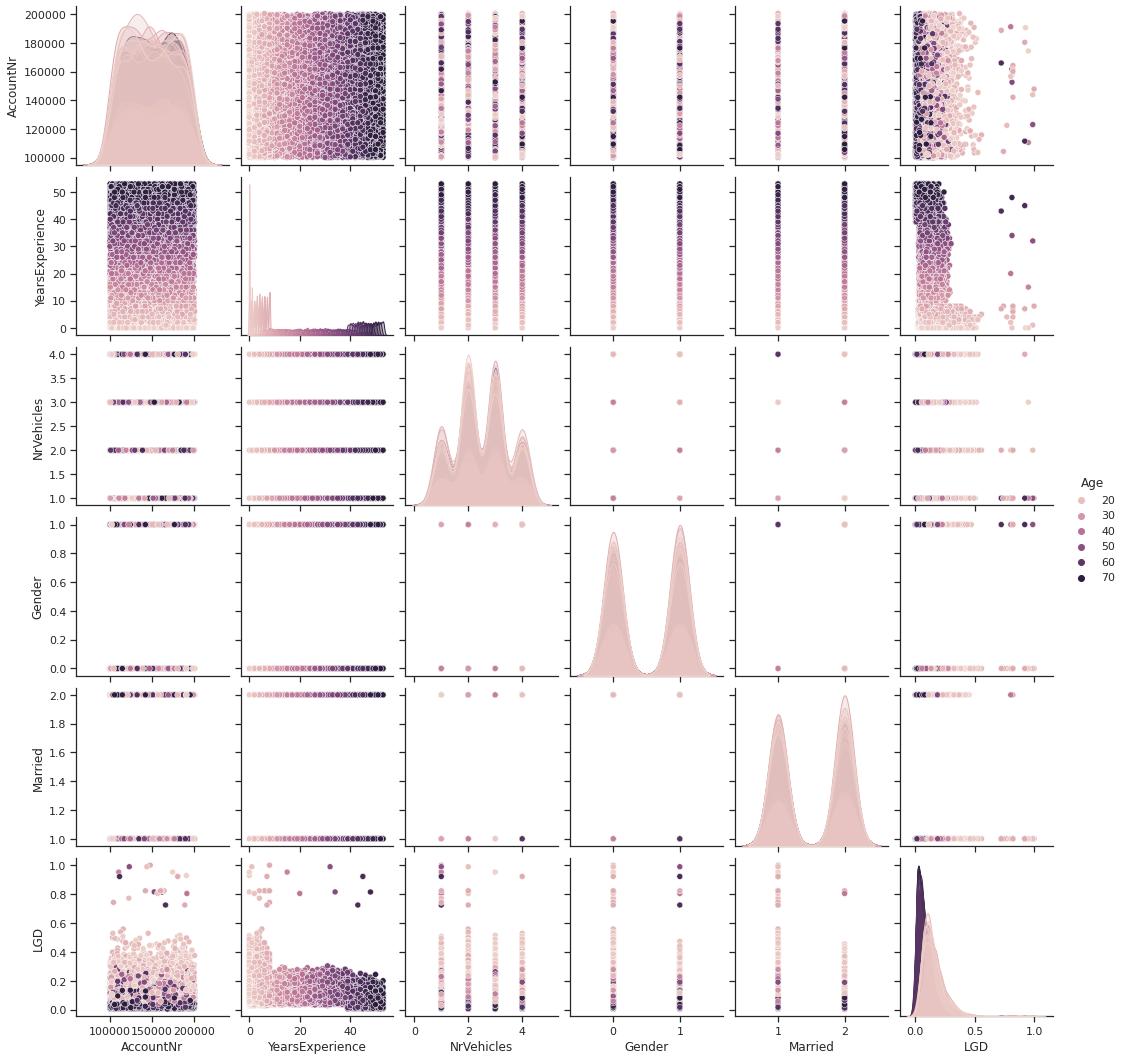

In [ ]:
np.seterr(divide='ignore', invalid='ignore')
sns.pairplot(data, hue= 'Age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


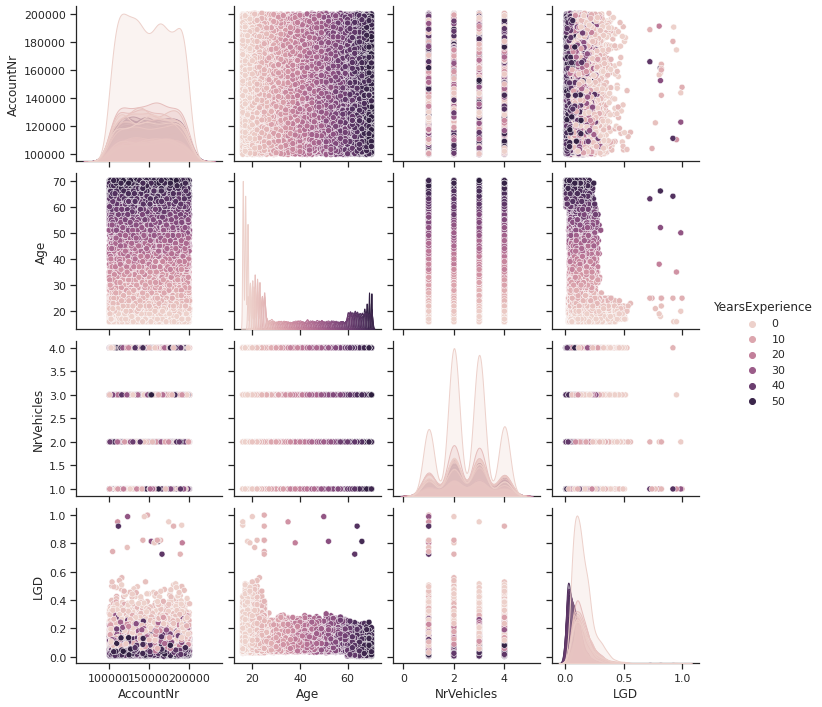

In [ ]:
np.seterr(divide='ignore', invalid='ignore')
sns.pairplot(data, hue= 'YearsExperience')

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


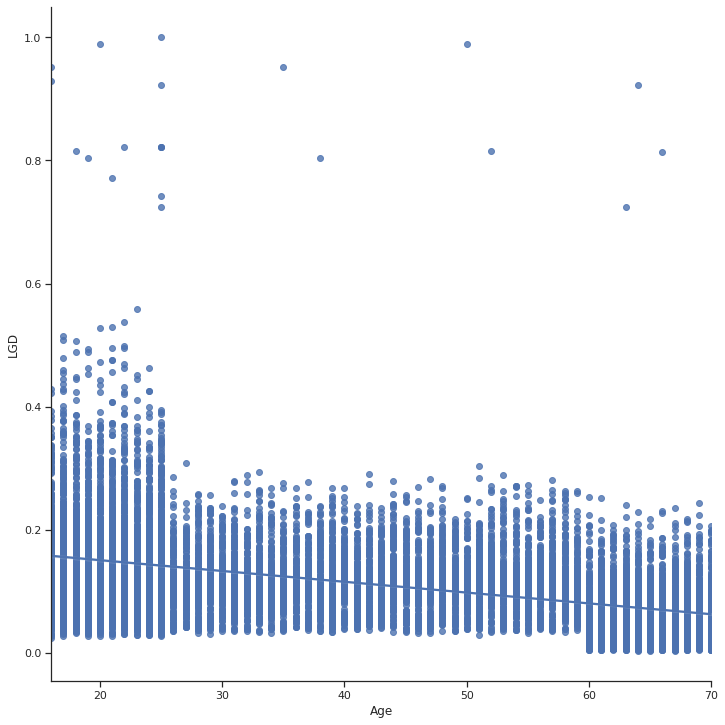

In [ ]:
sns.lmplot(x="Age",y="LGD",data=data,size=10)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


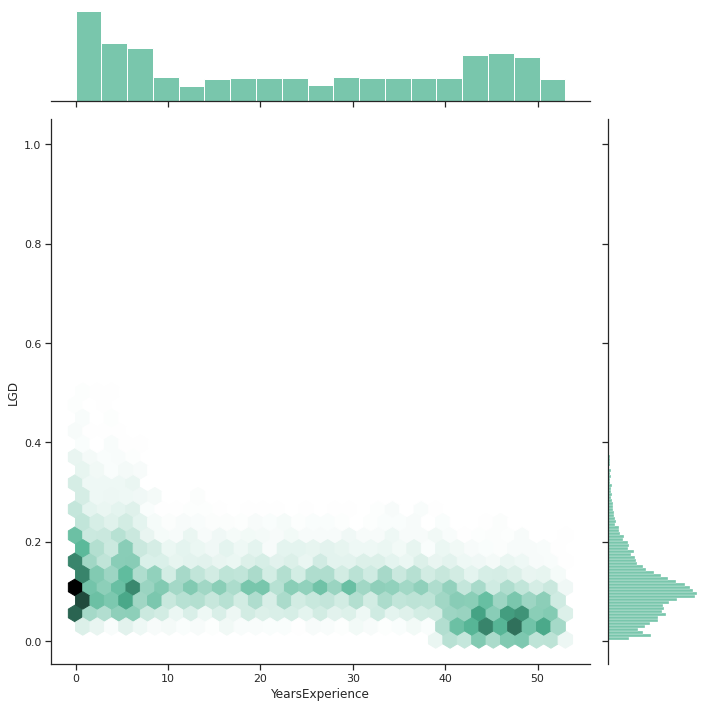

In [ ]:
sns.jointplot(data=data, x='YearsExperience', y='LGD', kind='hex', color="#4CB391",size=10)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


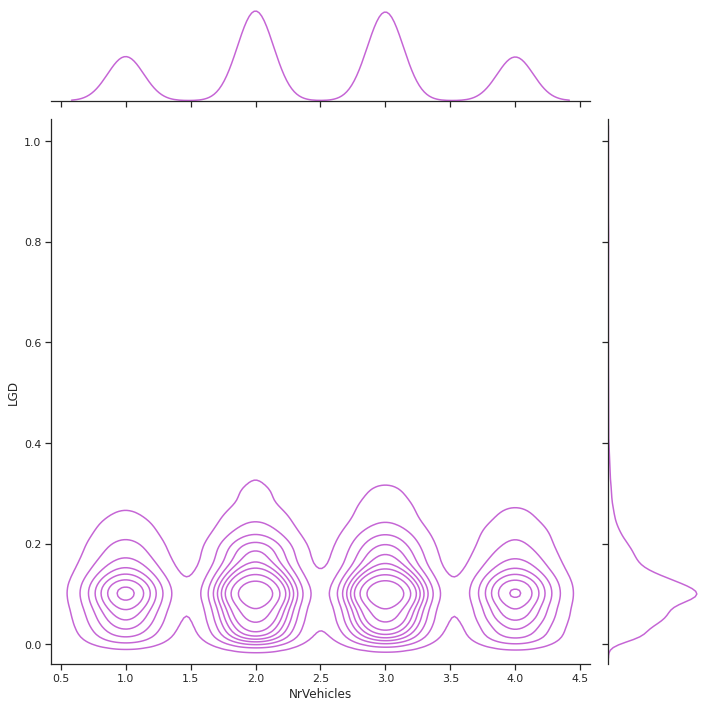

In [ ]:
tableau_20=(197/255.,101/255.,213/255.)
sns.jointplot(data=data, x='NrVehicles', y='LGD',space=0.2, kind='kde', color=tableau_20,size=10)

## Correlation analysis

In [ ]:
data_corr=data.corr().transpose()
data_corr.head()

,AccountNr,Age,YearsExperience,NrVehicles,Gender,Married,LGD
AccountNr,1.000000,0.008291,0.008437,-0.003056,-0.000979,-0.002090,-0.000794
Age,0.008291,1.000000,0.997161,0.008366,-0.005396,-0.004321,-0.442962
YearsExperience,0.008437,0.997161,1.000000,0.008545,-0.007385,-0.005029,-0.442115
NrVehicles,-0.003056,0.008366,0.008545,1.000000,0.001155,-0.009524,-0.011553
Gender,-0.000979,-0.005396,-0.007385,0.001155,1.000000,0.008002,-0.184339


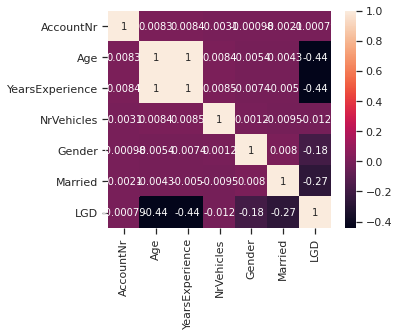

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(data_corr, annot=True)

# Linear Regression

In [64]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#Converting the coefficient values to a dataframe
#coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
#coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
#coeffcients

In [66]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [67]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.004754223822803438
Adjusted R^2: 0.002088386922328933
MAE: 1.5127231008857118
MSE: 17.081601855208664
RMSE: 4.132989457427718


In [68]:
#len(data.index) #15290
#len(X_train)

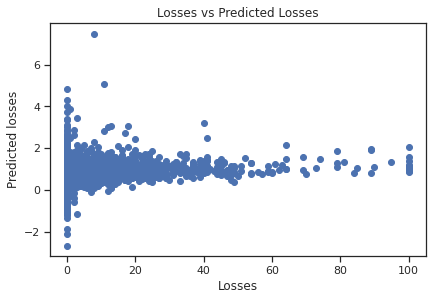

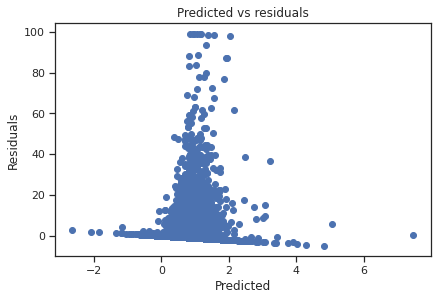

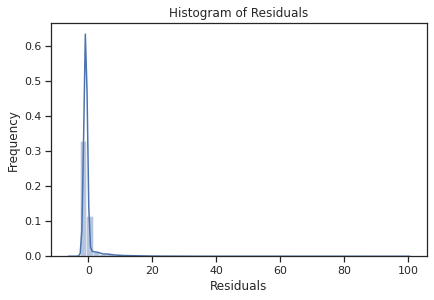

In [69]:
# Visualizing the differences between actual losses and predicted losses
plt.scatter(y_train, y_pred)
plt.xlabel("Losses")
plt.ylabel("Predicted losses")
plt.title("Losses vs Predicted Losses")
plt.show()

# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [70]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [71]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


R^2: -11.941611102544774
Adjusted R^2: -12.081404682963466
MAE: 1.5662757909993008
MSE: 190.47137594209718
RMSE: 13.80113676267637


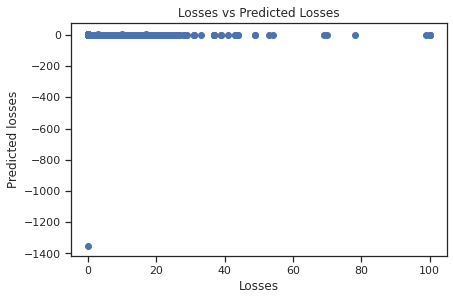

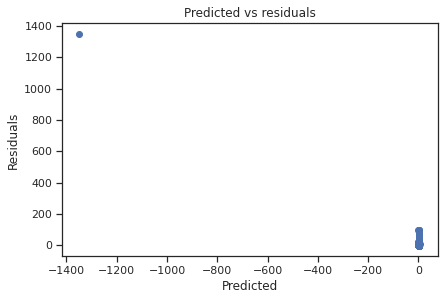

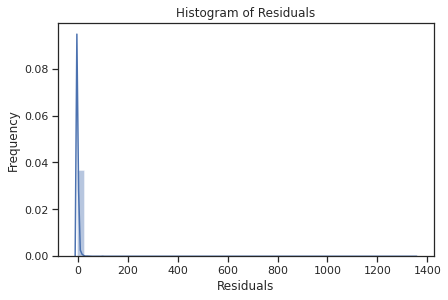

In [72]:
# Visualizing the differences between actual losses and predicted losses
plt.scatter(y_test, y_test_pred)
plt.xlabel("Losses")
plt.ylabel("Predicted losses")
plt.title("Losses vs Predicted Losses")
plt.show()

# Checking residuals
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Random Forest Regressor

In [73]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [77]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.851202914636825
Adjusted R^2: 0.8508043510153165
MAE: 0.6404538891028109
MSE: 2.5538340681555645
RMSE: 1.5980719846601292


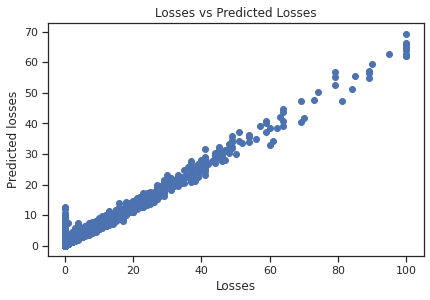

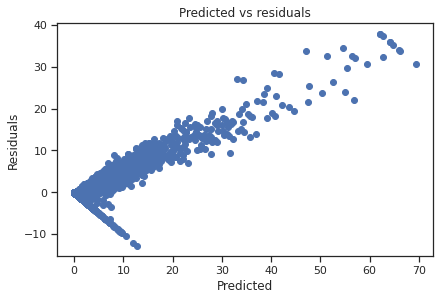

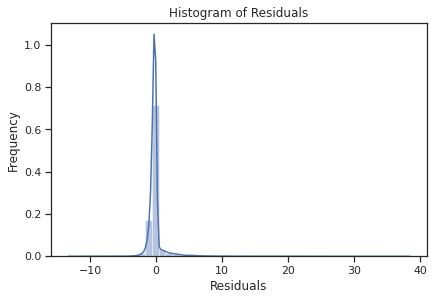

In [78]:
# Visualizing the differences between actual losses and predicted losses
plt.scatter(y_train, y_pred)
plt.xlabel("Losses")
plt.ylabel("Predicted losses")
plt.title("Losses vs Predicted Losses")
plt.show()

# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [79]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [80]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.10636038348099097
Adjusted R^2: -0.11831114278095112
MAE: 1.6831921447824412
MSE: 16.283133750481323
RMSE: 4.035236517291312


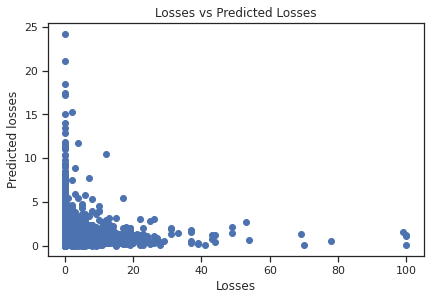

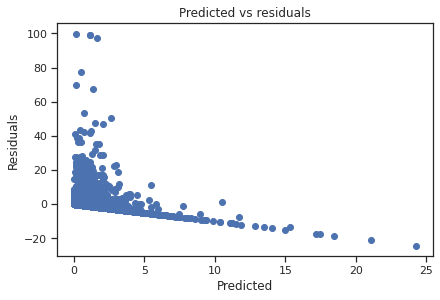

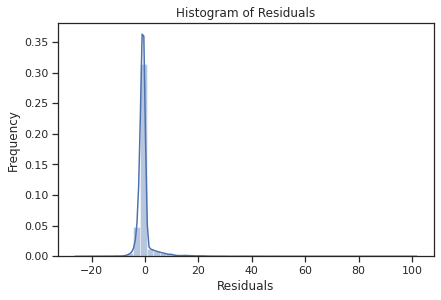

In [81]:
# Visualizing the differences between actual losses and predicted losses
plt.scatter(y_test, y_test_pred)
plt.xlabel("Losses")
plt.ylabel("Predicted losses")
plt.title("Losses vs Predicted Losses")
plt.show()

# Checking residuals
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Neural network

In [82]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [83]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1792      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 20,609
Trainable params: 20,609
Non-trainable params: 0
_________________________________________________________________


In [84]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)#, callbacks=callbacks_list)

Epoch 1/500
1039/1039 [==============================] - 15s 2ms/step - loss: 0.8204 - mean_absolute_error: 0.8204 - val_loss: 0.8849 - val_mean_absolute_error: 0.8849
Epoch 2/500
1039/1039 [==============================] - 2s 2ms/step - loss: 0.8453 - mean_absolute_error: 0.8453 - val_loss: 0.8851 - val_mean_absolute_error: 0.8851
Epoch 3/500
1039/1039 [==============================] - 2s 2ms/step - loss: 0.8144 - mean_absolute_error: 0.8144 - val_loss: 0.8849 - val_mean_absolute_error: 0.8849
Epoch 4/500
1039/1039 [==============================] - 2s 2ms/step - loss: 0.8195 - mean_absolute_error: 0.8195 - val_loss: 0.8849 - val_mean_absolute_error: 0.8849
Epoch 5/500
1039/1039 [==============================] - 2s 2ms/step - loss: 0.8250 - mean_absolute_error: 0.8250 - val_loss: 0.8849 - val_mean_absolute_error: 0.8849
Epoch 6/500
1039/1039 [==============================] - 2s 2ms/step - loss: 0.8031 - mean_absolute_error: 0.8031 - val_loss: 0.8850 - val_mean_absolute_error: 0.88

In [85]:
# Model prediction on train data
y_pred = NN_model.predict(X_train)

In [86]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: -0.03139538964096
Adjusted R^2: -0.03415805586321241
MAE: 0.8339091392079895
MSE: 17.702044884647613
RMSE: 4.207379812264114


In [87]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [88]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.10636038348099097
Adjusted R^2: -0.11831114278095112
MAE: 1.6831921447824412
MSE: 16.283133750481323
RMSE: 4.035236517291312


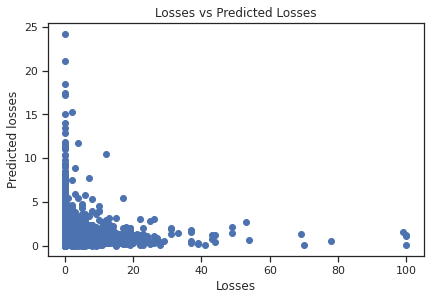

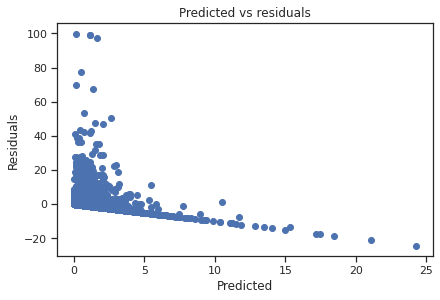

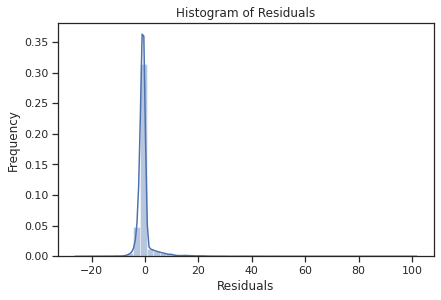

In [89]:
# Visualizing the differences between actual losses and predicted losses
plt.scatter(y_test, y_test_pred)
plt.xlabel("Losses")
plt.ylabel("Predicted losses")
plt.title("Losses vs Predicted Losses")
plt.show()

# Checking residuals
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# KNN

In [90]:
#Stochastic Gradient Descent # Linear and performing like the linear regression
from sklearn.neighbors import KNeighborsRegressor

# Always scale the input. The most convenient way is to use a pipeline.
reg = KNeighborsRegressor(n_neighbors=2)

# Train the model using the training sets 
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

R^2: 0.5135924087118433
Adjusted R^2: 0.5122895312351785
MAE: 0.7858346168656142
MSE: 8.348310550635349
RMSE: 2.8893443115411754


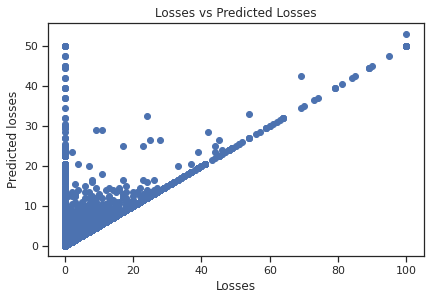

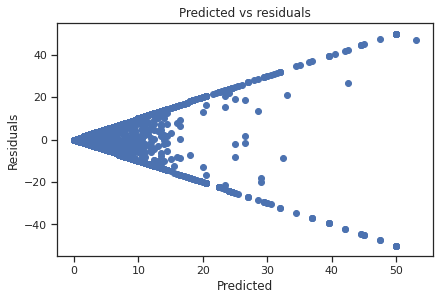

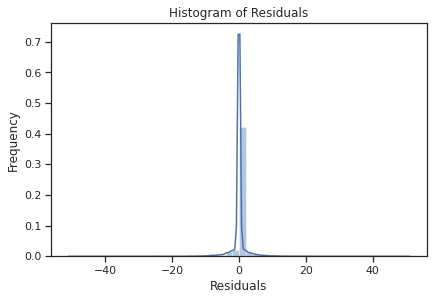

In [91]:
# Model prediction on train data
y_pred = reg.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Visualizing the differences between actual losses and predicted losses
plt.scatter(y_train, y_pred)
plt.xlabel("Losses")
plt.ylabel("Predicted losses")
plt.title("Losses vs Predicted Losses")
plt.show()

# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

R^2: -0.5488759488818487
Adjusted R^2: -0.5656067030980694
MAE: 1.4633230650750866
MSE: 22.79596649980747
RMSE: 4.774512174013956


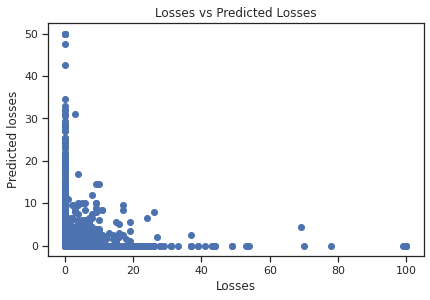

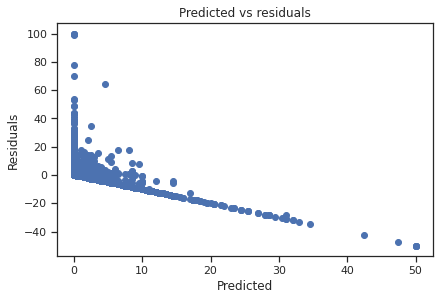

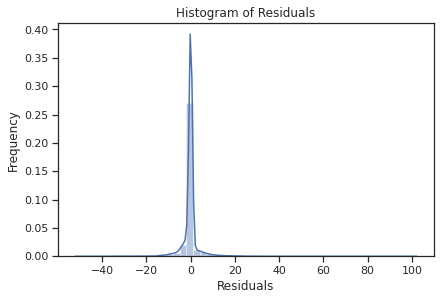

In [92]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Visualizing the differences between actual losses and predicted losses
plt.scatter(y_test, y_test_pred)
plt.xlabel("Losses")
plt.ylabel("Predicted losses")
plt.title("Losses vs Predicted Losses")
plt.show()

# Checking residuals
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# SVM

In [ ]:
#Support Vector Regression
from sklearn import svm #

# Create a SVM
reg = svm.SVR()

# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: -0.026032804237855256
Adjusted R^2: -0.026512393283493196
MAE: 0.05291663106860253
MSE: 0.005221338043762216
RMSE: 0.07225882675329164


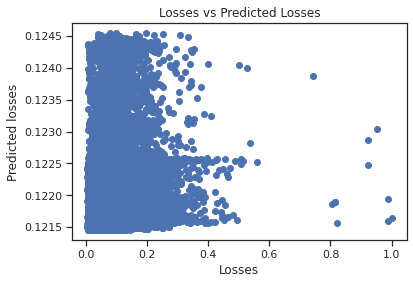

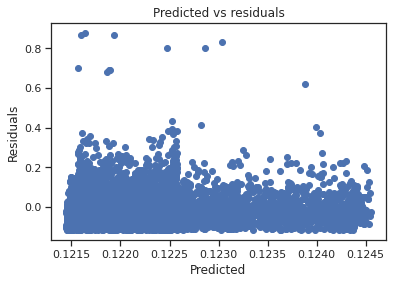

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


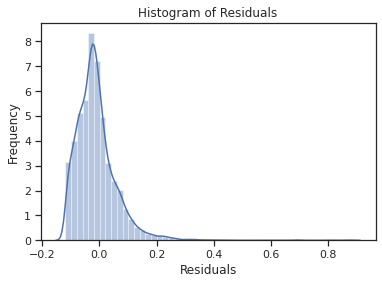

In [ ]:
# Visualizing the differences between actual losses and predicted losses
plt.scatter(y_train, y_pred)
plt.xlabel("Losses")
plt.ylabel("Predicted losses")
plt.title("Losses vs Predicted Losses")
plt.show()

# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.014092346962118363
Adjusted R^2: -0.015199193007700229
MAE: 0.05348963823376939
MSE: 0.005717459026945642
RMSE: 0.07561388117895843


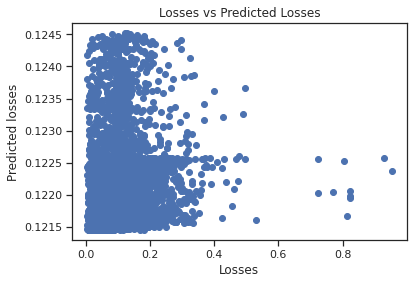

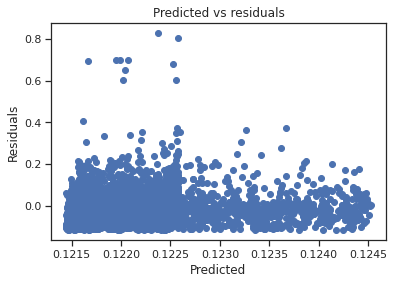

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


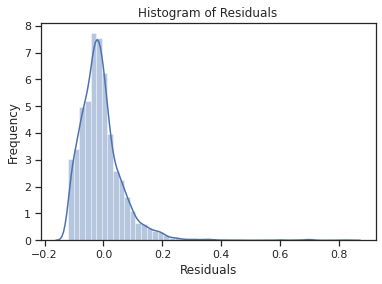

In [ ]:
# Visualizing the differences between actual losses and predicted losses
plt.scatter(y_test, y_test_pred)
plt.xlabel("Losses")
plt.ylabel("Predicted losses")
plt.title("Losses vs Predicted Losses")
plt.show()

# Checking residuals
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# SGD

In [ ]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor #
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

# Train the model using the training sets 
reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

R^2: 0.30787928144562393
Adjusted R^2: 0.30755576984491606
MAE: 0.04175239502271974
MSE: 0.003522105944115851
RMSE: 0.05934733308343224


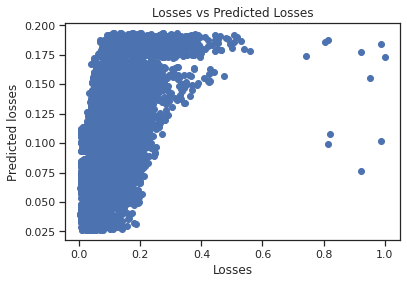

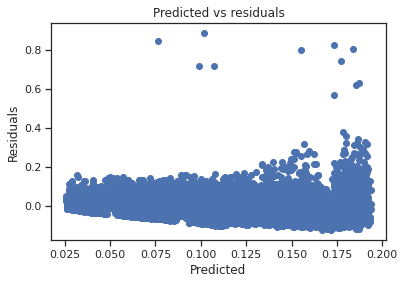

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


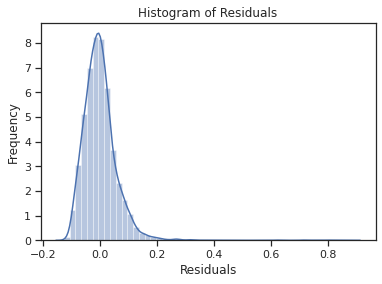

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Visualizing the differences between actual losses and predicted losses
plt.scatter(y_train, y_pred)
plt.xlabel("Losses")
plt.ylabel("Predicted losses")
plt.title("Losses vs Predicted Losses")
plt.show()

# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

R^2: 0.28510127844835054
Adjusted R^2: 0.28432099169703895
MAE: 0.04311658823301539
MSE: 0.004030603486094608
RMSE: 0.06348703399982242


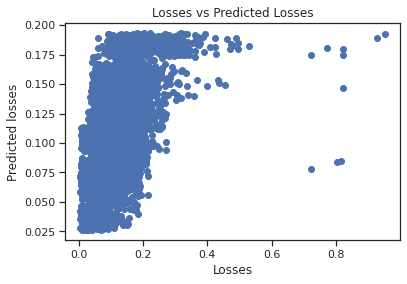

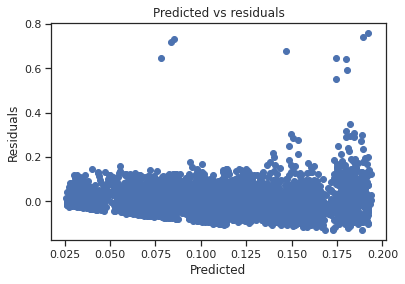

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


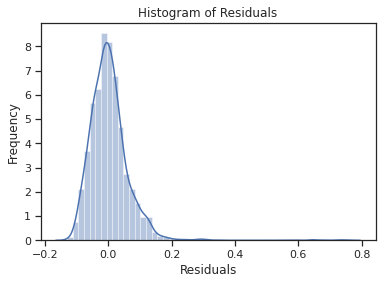

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Visualizing the differences between actual losses and predicted losses
plt.scatter(y_test, y_test_pred)
plt.xlabel("Losses")
plt.ylabel("Predicted losses")
plt.title("Losses vs Predicted Losses")
plt.show()

# Checking residuals
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()